Pandas está construido sobre la base de Numpy y tiene utilidades muy importantes que vamos a ver a lo largo de este notebook

Video: https://www.youtube.com/watch?v=zZkNOdBWgFQ&t=188s

Documentación: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [1]:
# importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel('titanic3.xls')
pd.read_excel('titanic3.xls')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
# veamos el número de registros y de campos
data.shape

(1309, 14)

In [4]:
# es necesarios saber cuáles son los nombres de los campos
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
# vamos a eliminar algunos campos para hacer uso de los que nos resultan útiles
data = data.drop(['name','sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [6]:
# representamos ahora los datos
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [7]:
# echemos un vistazo general a la tabla
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Fijémonos en la tabla que hemos obtenido gracias al método .describe(), en la primera fila aparecen la cuenta de los datos de cada campo. En los dos primeros podemos ver que el valor es el mismo 1309, mientras que en el segundo vemos que hay menos, 1049. Esto nos indica que hay valores que faltan y esto puede alterar nuestro análisis. 
Para escenarios en los que faltan datos podemos operar de dos maneras: 
1- completar los huecos con un valor por defecto, usando por ejemplo la media para rellenar los huecos
2- el segundo método es eliminar las filas con registros incompletos

In [8]:
# para el primer caso de rellenar los huecon con la media
data = data.fillna(data['age'].mean())
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,12.883199
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,22.000000
50%,3.000000,0.000000,29.881135
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


In [10]:
# usando el segundo método de eliminación

# data =  data.dropna(axis=0)
# data.describe()

In [12]:
# Contar los pasajeros por cada clase
data['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

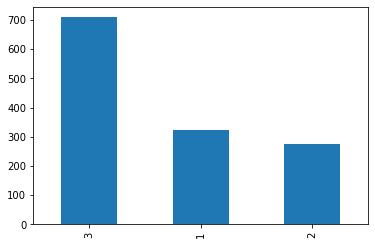

In [13]:
# representar gráficamente
data['pclass'].value_counts().plot.bar()
plt.show()

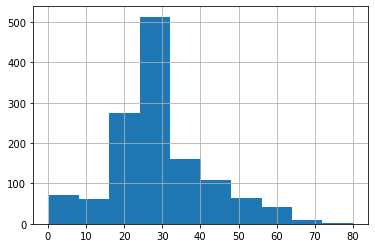

In [15]:
# representar las edades
data['age'].hist()

In [18]:
# podemos estudiar estadísticamente agrupando los datos por los valores que toma un campo
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.154506,0.727468,28.886935
male,2.372479,0.190985,30.430716


In [ ]:
# y por varios campos
data.groupby(['sex', 'pclass']).mean()

Dentro de Pandas existen dos tipos estructuras de datos: las Series y los DataFrames. En otras palabras, los campos y las tablas.

In [20]:
# Una Serie no es más que un ndarray numpy 1D y un eje de índices independientes del array
data['age']

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

In [34]:
# me traigo de nuevo la tabla para el siguiente ejemplo
data = pd.read_excel('titanic3.xls')
data = data.drop(['sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [35]:
# podemos cambiar esa primera columna de índice por cualquier otro valor
data = data.set_index('name')
data['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

Las tablas tienen un comportamiento parecido a los diccionarios. 
    
    Dicccionarios Dict['clave'] = valor
    Tablas        Df['campo'] = serie
    
De igual manera, podemos tomar un DataFrame y realizar acciones de indexing y slicing ya que se trata de un conjunto de arrays de numpy

In [36]:
# indexar los 30 primeros valores
data['age'][0:30]

name
Allen, Miss. Elisabeth Walton                        29.0000
Allison, Master. Hudson Trevor                        0.9167
Allison, Miss. Helen Loraine                          2.0000
Allison, Mr. Hudson Joshua Creighton                 30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)      25.0000
Anderson, Mr. Harry                                  48.0000
Andrews, Miss. Kornelia Theodosia                    63.0000
Andrews, Mr. Thomas Jr                               39.0000
Appleton, Mrs. Edward Dale (Charlotte Lamson)        53.0000
Artagaveytia, Mr. Ramon                              71.0000
Astor, Col. John Jacob                               47.0000
Astor, Mrs. John Jacob (Madeleine Talmadge Force)    18.0000
Aubart, Mme. Leontine Pauline                        24.0000
Barber, Miss. Ellen "Nellie"                         26.0000
Barkworth, Mr. Algernon Henry Wilson                 80.0000
Baumann, Mr. John D                                      NaN
Baxter, Mr. Quigg E

In [37]:
# realizar una máscara
data['age']>18

name
Allen, Miss. Elisabeth Walton                       True
Allison, Master. Hudson Trevor                     False
Allison, Miss. Helen Loraine                       False
Allison, Mr. Hudson Joshua Creighton                True
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)     True
                                                   ...  
Zabour, Miss. Hileni                               False
Zabour, Miss. Thamine                              False
Zakarian, Mr. Mapriededer                           True
Zakarian, Mr. Ortin                                 True
Zimmerman, Mr. Leo                                  True
Name: age, Length: 1309, dtype: bool

In [38]:
# indexado lógico (boolean indexing)
data[data['age']>18]

,pclass,survived,sex,age
name,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0
"Anderson, Mr. Harry",1,1,male,48.0
"Andrews, Miss. Kornelia Theodosia",1,1,female,63.0
...,...,...,...,...
"Yasbeck, Mr. Antoni",3,0,male,27.0
"Youseff, Mr. Gerious",3,0,male,45.5
"Zakarian, Mr. Mapriededer",3,0,male,26.5


In [40]:
# agrupar por sexo y clase los pasajeros menores de 18 años
data[data['age']>18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.966667  39.358333
       2       0.878049  32.067073
       3       0.436170  29.457447
male   1       0.328671  42.716783
       2       0.087591  34.069343
       3       0.158845  29.799639

,pclass,survived,sex,age
0,1,1,female,29.000000
1,1,1,male,0.916700
2,1,0,female,2.000000
3,1,0,male,30.000000
4,1,0,female,25.000000
...,...,...,...,...
1304,3,0,female,14.500000
1305,3,0,female,29.881135
1306,3,0,male,26.500000
1307,3,0,male,27.000000
